In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Example usage
n0 = 1.45  # Refractive index of glass
n1 = 1.0   # Refractive index of air
n2 = 1.45  # Refractive index of glass
phi0 = np.radians(45)  # Incident angle in radians
wavelength = 1.55e-6  # Wavelength of light (1.55 microns)
T_target = 0.5  # Desired transmission (50%)

According to **Frustrated Total Internal Reflection and Application of Its Principle to Laser Cavity Design** by Ian N. Court and Frederick K. von Willisen - The transmission coefficient, $T$, is given by:

$$
\frac{1}{1 - |r|^2} = \frac{1}{T} = \alpha \sinh^2 y + \beta,
$$

where

$$
y = 2\pi \frac{n_1 d}{\lambda} \sqrt{N^2 \sin^2 \phi_0 - 1},
$$

$$
\alpha_s = \frac{(N^2 - 1)(n^2 N^2 - 1)}{4N^2 \cos \phi_0 (N^2 \sin^2 \phi_0 - 1) \sqrt{n^2 - \sin^2 \phi_0}},
$$

$$
\beta_s = \frac{(\sqrt{n^2 - \sin^2 \phi_0} + \cos \phi_0)^2}{4 \cos \phi_0 \sqrt{n^2 - \sin^2 \phi_0}},
$$

$$
\alpha_p = \frac{\alpha_s}{n^2} \left\{ (N^2 + 1) \sin^2 \phi_0 - 1 \right\} \left\{ (n^2 N^2 + 1) \sin^2 \phi_0 - n^2 \right\},
$$

$$
\beta_p = \frac{\left( \sqrt{n^2 - \sin^2 \phi_0} + n^2 \cos \phi_0 \right)^2}{4n^2 \cos \phi_0 \sqrt{n^2 - \sin^2 \phi_0}},
$$

with $n = n_2 / n_0 $ and $ N = n_0 / n_1 $

In [4]:
def calculate_T_TE(n0, n1, n2, phi0, d, wavelength):
    # Calculate derived parameters
    N = n0 / n1
    n = n2 / n0

    # Calculate y
    y = (2 * np.pi * n1 * d / wavelength) * np.sqrt(N ** 2 * np.sin(phi0) ** 2 - 1)

    # Calculate alpha_s
    alpha_s = ((N ** 2 - 1) * (n ** 2 * N ** 2 - 1)) / (
        4 * N ** 2 * np.cos(phi0) * (N ** 2 * np.sin(phi0) ** 2 - 1) * np.sqrt(n ** 2 - np.sin(phi0) ** 2)
    )

    # Calculate beta_s
    beta_s = ((np.sqrt(n ** 2 - np.sin(phi0) ** 2) + np.cos(phi0)) ** 2) / (
        4 * np.cos(phi0) * np.sqrt(n ** 2 - np.sin(phi0) ** 2)
    )

    # Calculate T
    T = 1 / (alpha_s * np.sinh(y) ** 2 + beta_s)

    return T

In [5]:
def find_d(n0, n1, n2, phi0, wavelength, T_target):
    # Objective function for root finding
    def objective(d):
        return calculate_T_TE(n0, n1, n2, phi0, d, wavelength) - T_target

    # Solve for d using a numerical solver
    result = root(objective, x0=1e-6)  # Initial guess for d (1 micron)
    if result.success:
        return result.x[0]
    else:
        raise ValueError("Failed to find d for the given T")


In [6]:
d = find_d(n0, n1, n2, phi0, wavelength, T_target)
print(f"Calculated air gap thickness (d): {d :.4e}")

Calculated air gap thickness (d): 4.4626e-07


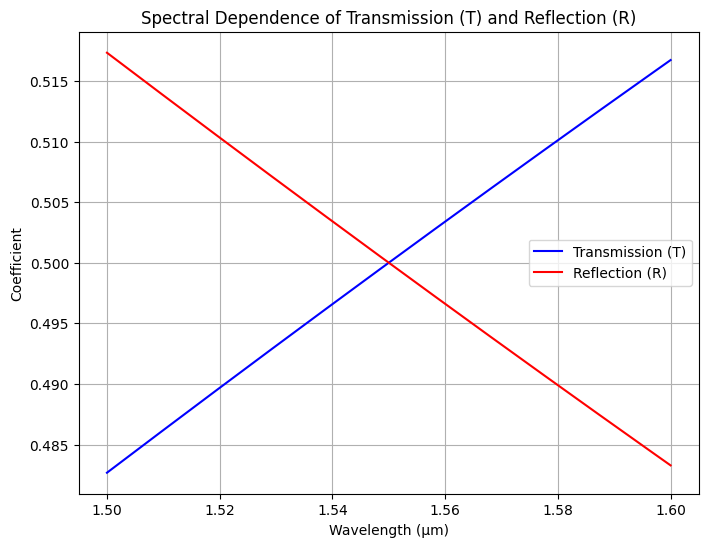

In [7]:
wavelengths = np.linspace(1.5e-6, 1.6e-6, 1000)  # Wavelength range from 1.5 to 1.6 microns

# Calculate T for each wavelength
T_values = [calculate_T_TE(n0, n1, n2, phi0, d, wavelength) for wavelength in wavelengths]
R_values = [1 - T for T in T_values]

# Plotting T and R
plt.figure(figsize=(8, 6))
plt.plot(wavelengths * 1e6, T_values, label="Transmission (T)", color="blue")
plt.plot(wavelengths * 1e6, R_values, label="Reflection (R)", color="red")
plt.title("Spectral Dependence of Transmission (T) and Reflection (R)")
plt.xlabel("Wavelength (µm)")
plt.ylabel("Coefficient")
plt.grid(True)
plt.legend()
plt.show()